In [38]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from redist import modifier
import knunu_utils
import ksnunu_utils

from bayesian_pyhf import plotting
import arviz as az
import corner

In [39]:
files       = ['knunu_model_1b.json', 'ksnunu_model_1b.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]

model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)
yields = data[:model.config.nmaindata]

## Load and plot samples

In [40]:
post_data = az.from_json( 'samples/comb_post_data.json')
post_pred = az.from_json( 'samples/comb_post_pred.json')
prior_pred = az.from_json('samples/comb_prior_pred.json')

In [41]:
post_data.posterior

<xarray.Dataset>
Dimensions:                      (chain: 4, draw: 100000,
                                  FFK_decorrelated[0]_dim_0: 1,
                                  FFK_decorrelated[1]_dim_0: 1,
                                  FFK_decorrelated[2]_dim_0: 1,
                                  FFK_decorrelated[3]_dim_0: 1,
                                  FFK_decorrelated[4]_dim_0: 1,
                                  ...
                                  FFKs_decorrelated[10]_dim_0: 1,
                                  FFKs_decorrelated[11]_dim_0: 1,
                                  FFKs_decorrelated[12]_dim_0: 1,
                                  FFKs_decorrelated[13]_dim_0: 1, cvl_dim_0: 1,
                                  cvr_dim_0: 1, csl_dim_0: 1, csr_dim_0: 1,
                                  ctl_dim_0: 1)
Coordinates: (12/31)
  * chain                        (chain) int64 0 1 2 3
  * draw                         (draw) int64 0 1 2 3 ... 99997 99998 99999
  * FFK_decorrelated[0]_dim_0    (FFK_decorrelated[0]_dim_0) int64 0
  * FFK_decorrelated[1]_dim_0    (FFK_decorrelated[1]_dim_0) int64 0
  * FFK_decorrelated[2]_dim_0    (FFK_decorrelated[2]_dim_0) int64 0
  * FFK_decorrelated[3]_dim_0    (FFK_decorrelated[3]_dim_0) int64 0
    ...                           ...
  * FFKs_decorrelated[13]_dim_0  (FFKs_decorrelated[13]_dim_0) int64 0
  * cvl_dim_0                    (cvl_dim_0) int64 0
  * cvr_dim_0                    (cvr_dim_0) int64 0
  * csl_dim_0                    (csl_dim_0) int64 0
  * csr_dim_0                    (csr_dim_0) int64 0
  * ctl_dim_0                    (ctl_dim_0) int64 0
Data variables: (12/29)
    FFK_decorrelated[0]          (chain, draw, FFK_decorrelated[0]_dim_0) float64 ...
    FFK_decorrelated[1]          (chain, draw, FFK_decorrelated[1]_dim_0) float64 ...
    FFK_decorrelated[2]          (chain, draw, FFK_decorrelated[2]_dim_0) float64 ...
    FFK_decorrelated[3]          (chain, draw, FFK_decorrelated[3]_dim_0) float64 ...
    FFK_decorrelated[4]          (chain, draw, FFK_decorrelated[4]_dim_0) float64 ...
    FFK_decorrelated[5]          (chain, draw, FFK_decorrelated[5]_dim_0) float64 ...
    ...                           ...
    FFKs_decorrelated[13]        (chain, draw, FFKs_decorrelated[13]_dim_0) float64 ...
    cvl                          (chain, draw, cvl_dim_0) float64 3.623 ... 4...
    cvr                          (chain, draw, cvr_dim_0) float64 2.519 ... 2...
    csl                          (chain, draw, csl_dim_0) float64 0.6085 ... ...
    csr                          (chain, draw, csr_dim_0) float64 1.259 ... 1...
    ctl                          (chain, draw, ctl_dim_0) float64 1.068 ... 1...
Attributes:
    created_at:                 2023-12-14T15:12:20.161454
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.10.2
    sampling_time:              13446.923747301102
    tuning_steps:               10000

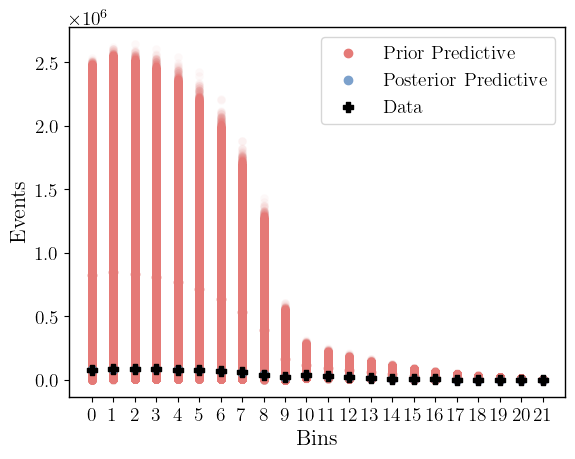

In [42]:
plotting.prior_posterior_predictives(model=model, data=yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

/home/l/Lorenz.Gaertner/micromamba/envs/redist/lib/python3.10/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (29), generating only 20 plots
  warnings.warn(


array([[<Axes: title={'center': 'FFKs_decorrelated[7]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[7]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[0]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[0]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[13]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[13]'}>],
       [<Axes: title={'center': 'csr'}>, <Axes: title={'center': 'csr'}>],
       [<Axes: title={'center': 'stat'}>,
        <Axes: title={'center': 'stat'}>],
       [<Axes: title={'center': 'FFK_decorrelated[0]'}>,
        <Axes: title={'center': 'FFK_decorrelated[0]'}>],
       [<Axes: title={'center': 'FFK_decorrelated[3]'}>,
        <Axes: title={'center': 'FFK_decorrelated[3]'}>],
       [<Axes: title={'center': 'FFK_decorrelated[7]'}>,
        <Axes: title={'center': 'FFK_decorrelated[7]'}>],
       [<Axes: title={'center': 'cvl'}>, <Axes: title={'center': 'cvl'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[8]'}>,
        <

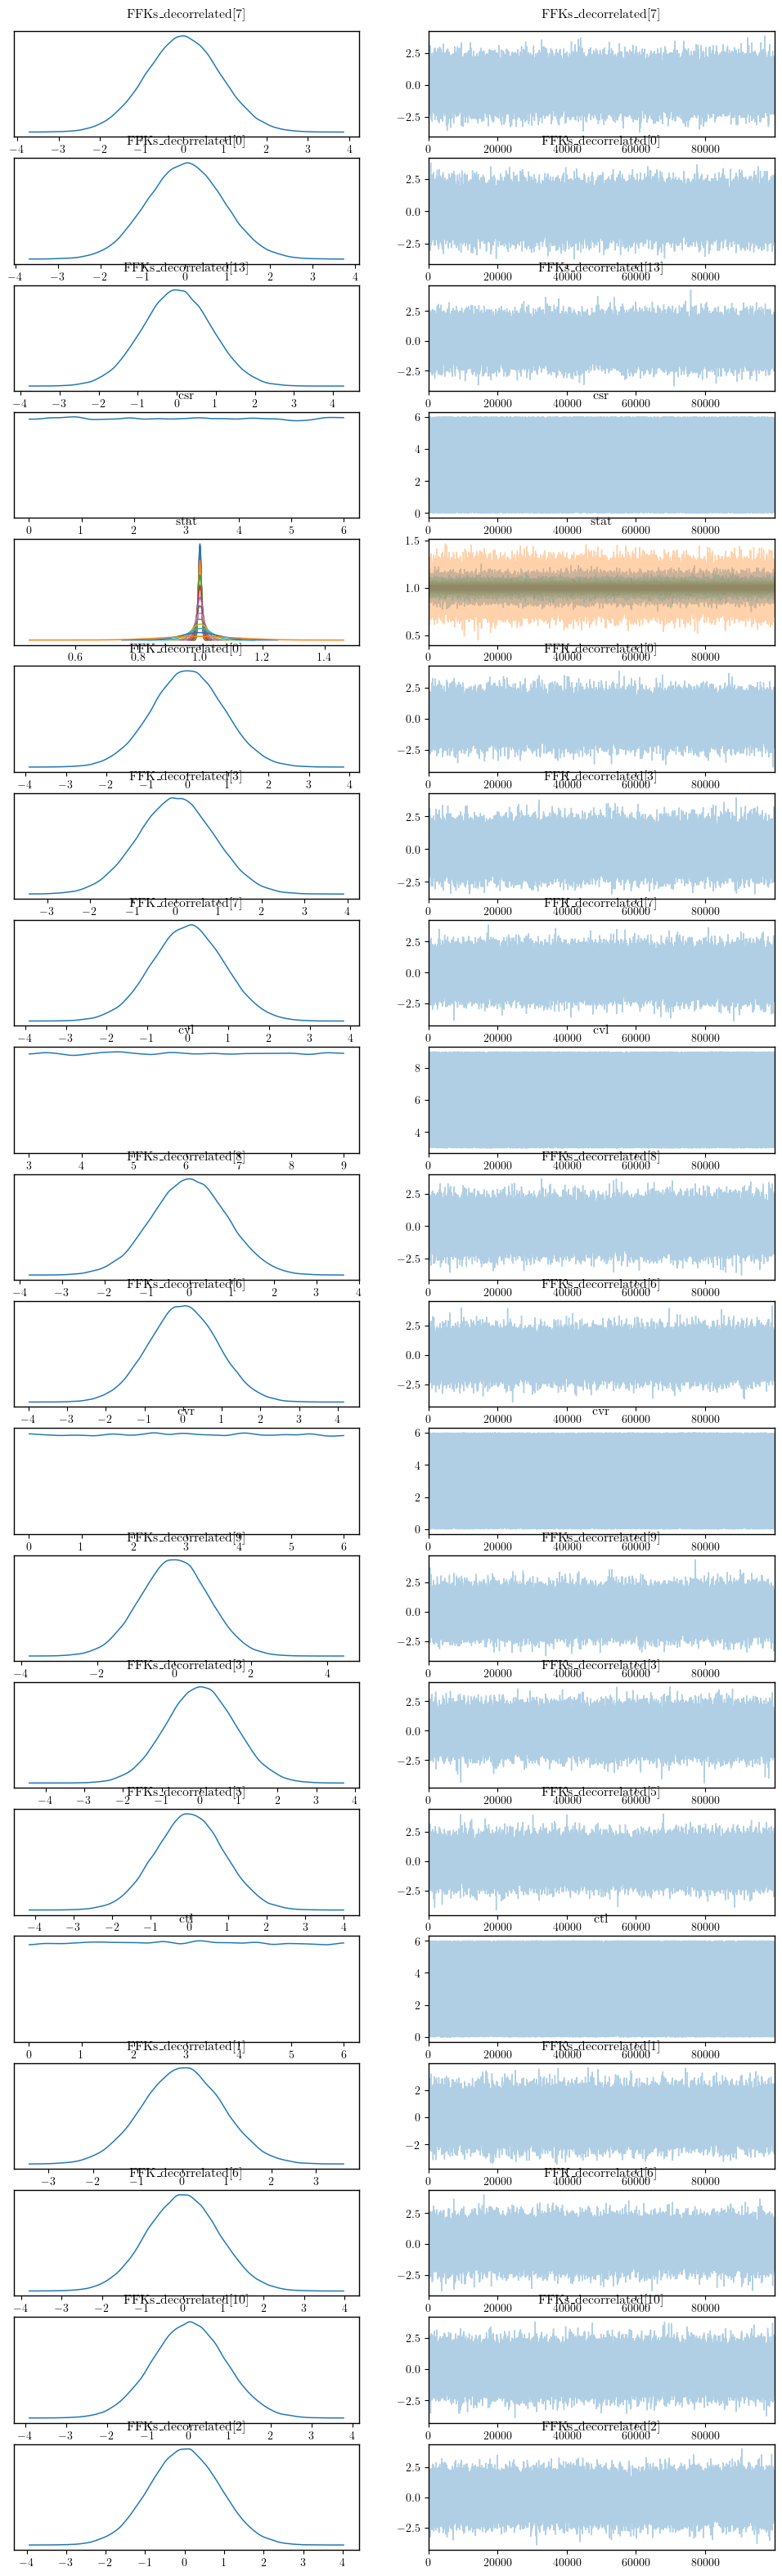

In [43]:
az.plot_trace(prior_pred.prior)

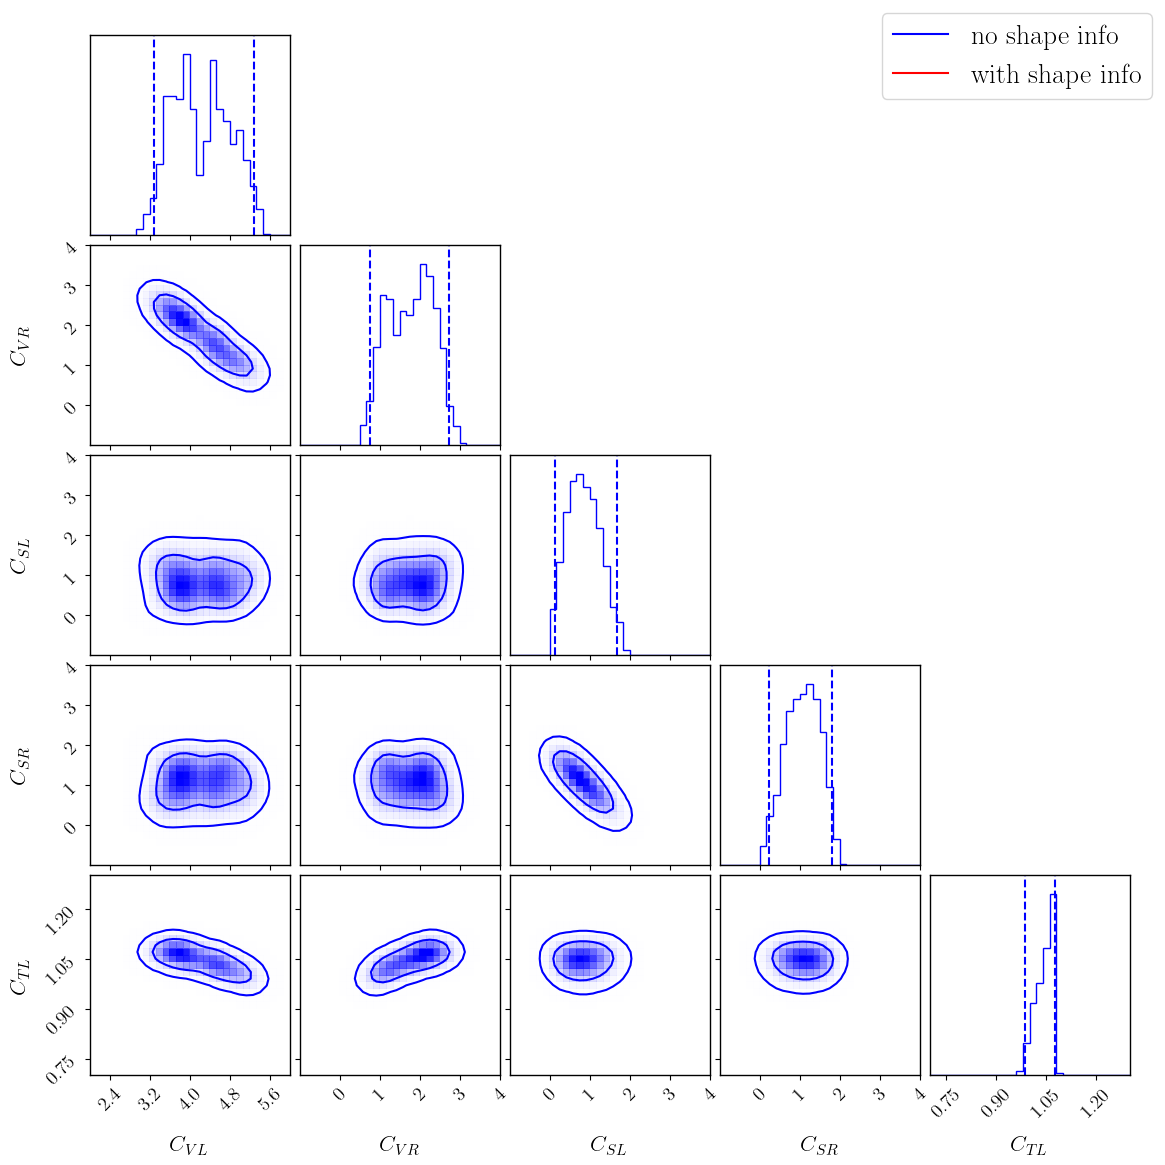

In [55]:
cvl = r'$C_{VL}$'
cvr = r'$C_{VR}$'
csl = r'$C_{SL}$'
csr = r'$C_{SR}$'
ctl = r'$C_{TL}$'
labels = [cvl, cvr, csl, csr, ctl]

file = 'results/combination_samples.pdf'

range = [(2, 6), (-1,4),(-1,4), (-1,4), (0.7,1.3)]

fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'cvr', 'csl', 'csr', 'ctl'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    range = range,
                    smooth=1.5,
                    labels=labels,
                    color='blue',
                    plot_datapoints=False,
                    );

fig.legend(
        handles=[
            mlines.Line2D([], [], color='blue', label='no shape info'),
            mlines.Line2D([], [], color='red', label='with shape info'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()

## Compare to simple reweighting

In [45]:
post_data_1b = az.from_json( 'samples/comb_1b_post_data.json')

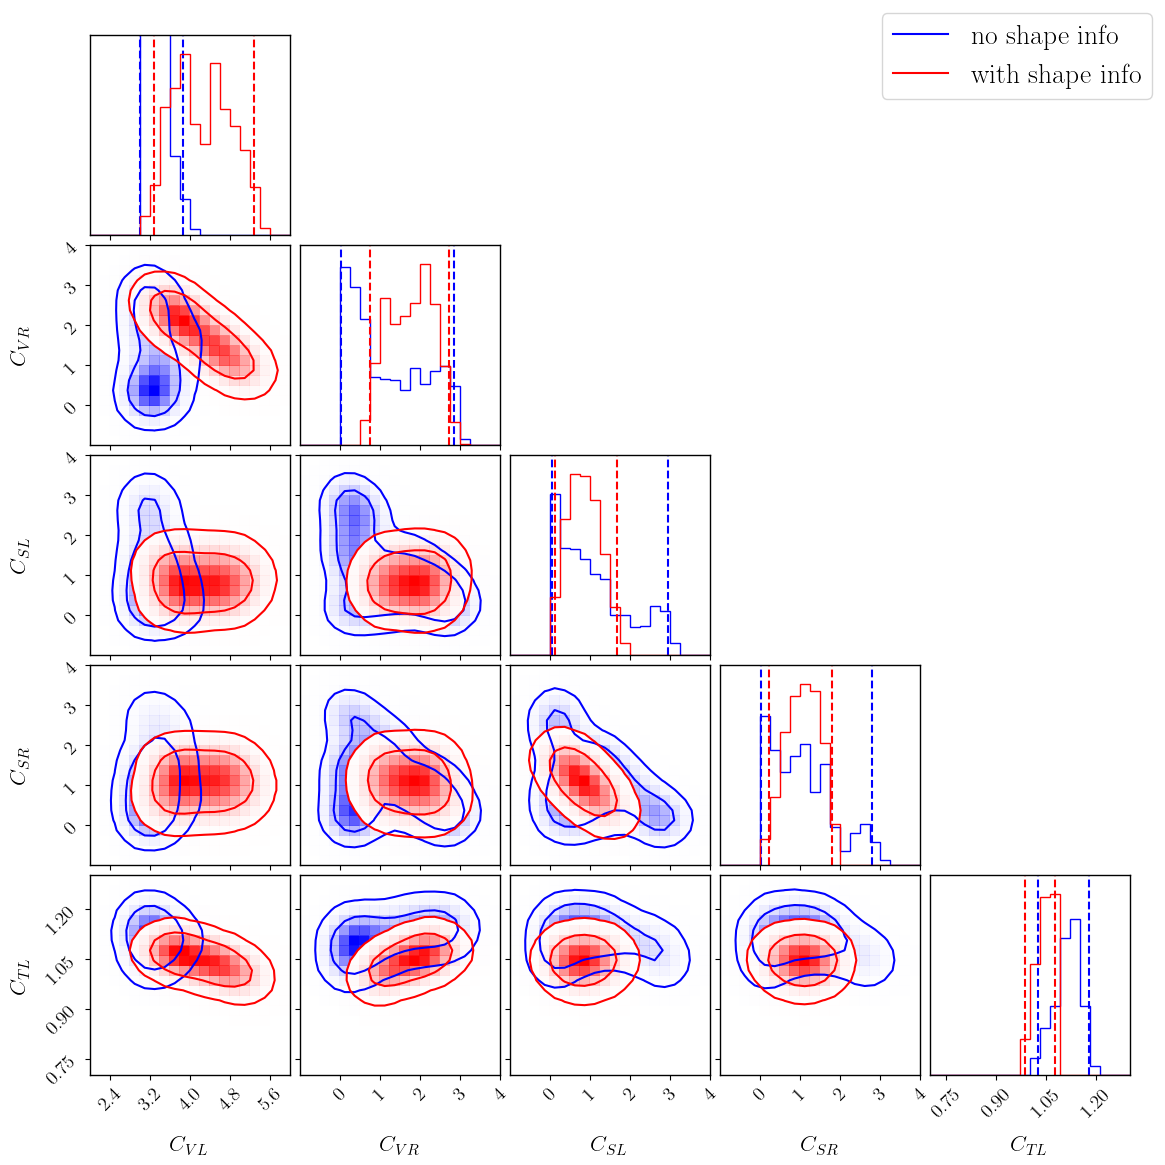

In [56]:
cvl = r'$C_{VL}$'
cvr = r'$C_{VR}$'
csl = r'$C_{SL}$'
csr = r'$C_{SR}$'
ctl = r'$C_{TL}$'
labels = [cvl, cvr, csl, csr, ctl]

file = 'results/combination_samples_compare.pdf'

fig = corner.corner(post_data_1b.posterior, 
                    var_names=['cvl', 'cvr', 'csl', 'csr', 'ctl'],
                    bins=20, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    range = range,
                    smooth=1.5,
                    labels=labels,
                    color='blue',
                    plot_datapoints=False,
                    );

fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'cvr', 'csl', 'csr', 'ctl'],
                    bins=20, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    range = range,
                    smooth=1.5,
                    labels=labels,
                    color='red',
                    plot_datapoints=False,
                    fig=fig
                    );

fig.legend(
        handles=[
            mlines.Line2D([], [], color='blue', label='no shape info'),
            mlines.Line2D([], [], color='red', label='with shape info'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()